In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Specify each path

In [ ]:
dataset = '/content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint.csv'
model_save_path = '/content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.hdf5'



```
# This is formatted as code
```

# Classification number setting

In [ ]:
NUM_CLASSES = 10

# Load learning data

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 12s - loss: 2.4732 - accuracy: 0.1172
Epoch 1: saving model to /content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 2s 61ms/step - loss: 2.4371 - accuracy: 0.1004 - val_loss: 2.3256 - val_accuracy: 0.0909
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.3113 - accuracy: 0.1094
Epoch 2: saving model to /content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 9ms/step - loss: 2.3529 - accuracy: 0.1174 - val_loss: 2.2862 - val_accuracy: 0.1042
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 2.3128 - accuracy: 0.0938
Epoch 3: saving model to /content/drive/MyDrive/ke_Ha_eske_Be/hand

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.8826


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 101ms/step
[0.07768016 0.00904586 0.28107804 0.00056609 0.00080958 0.03907682
 0.30404985 0.16428691 0.06435493 0.05905164]
6


# confusion matrix

17/17 [==============================] - 0s 1ms/step


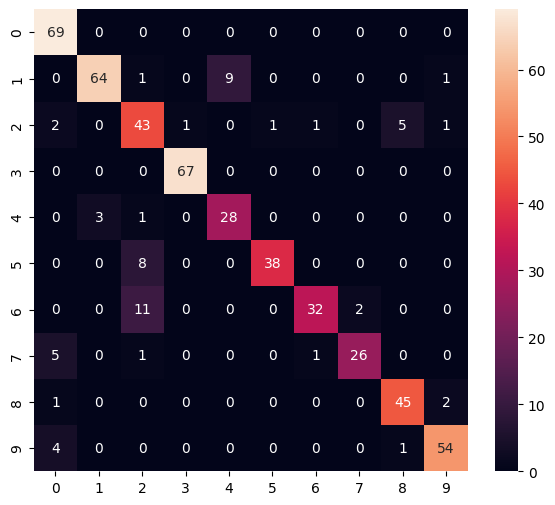

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        69
           1       0.96      0.85      0.90        75
           2       0.66      0.80      0.72        54
           3       0.99      1.00      0.99        67
           4       0.76      0.88      0.81        32
           5       0.97      0.83      0.89        46
           6       0.94      0.71      0.81        45
           7       0.93      0.79      0.85        33
           8       0.88      0.94      0.91        48
           9       0.93      0.92      0.92        59

    accuracy                           0.88       528
   macro avg       0.89      0.87      0.87       528
weighted avg       0.89      0.88      0.88       528



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)

In [ ]:
#transform the model (quantize)
tflite_save_path = '/content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6808

# reasoning test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.45 ms, sys: 35 µs, total: 1.49 ms
Wall time: 2.33 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.07768016 0.00904586 0.2810781  0.00056609 0.00080958 0.03907682
 0.30404994 0.16428693 0.06435494 0.05905162]
6


# convert to json file

In [1]:
!sudo pip3 install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

In [2]:
!sudo tensorflowjs_converter

2023-04-07 15:40:47.880810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 15:40:49.825828: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-07 15:40:49.826057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-07 15:40:49.826109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [5]:
!tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.hdf5' "/content/drive/MyDrive/ke_Ha_eske_Be/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/JSON"

2023-04-07 15:48:27.754845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 15:48:29.067121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-07 15:48:29.067239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-07 15:48:29.067252: W tensorfl